<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Mv-g-and-k-distribution/mvgandk_conv_slicedW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate g-and-k distribution

Notebook for the convergence of the sliced Wasserstein distance

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/ot_slicedW.ipynb"

Set path for saving the results (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

In [ ]:
np.random.seed(11)

## Sliced Wasserstein distance convergence for varying $n$

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]          # number of simulated samples - powers of 2
m = 2**15                                  # number of true samples
num = 25                                   # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])   # true theta
d = 1                                     # dimensions of data
p = theta.shape[0]                         # dimensions of parameter space
inv = True                                 # True: use inverse transform, False: use Box-Muller transform
n_projections = 100                        # number of projections
metric = 'euclidean'                       # 'euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(d)
else:  
  qmc = qmcpy.Halton(d+1)

Calculate sliced Wasserstein distance for varying $n$:

In [ ]:
if inv:
  w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv_inv('mvgandk',n,num,d,n_projections,metric,theta)
else:  
  w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv('mvgandk',n,num,d,n_projections,metric,theta)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the sliced Wasserstein distance against $n$:

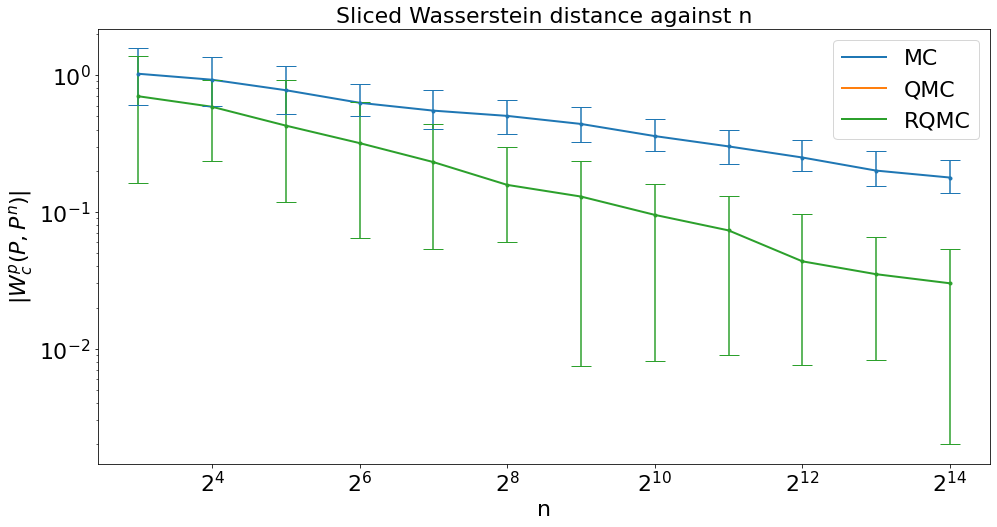

In [ ]:
plot_slicedW_conv(d,(16,8),w_mc,w_qmc,w_rqmc,'MC','QMC','RQMC',w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc)

In [ ]:
np.savez(path+"mvgandk_slicedw_n_d=%s_nproj=%s_%s.npz" %(d,n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)

## Sliced Wasserstein distance for varying $d$

Calculate sliced Wasserstein distance for varying $d$:

In [ ]:
np.random.seed(11)

In [ ]:
n = 2**13                                   # number of simulated samples
d = [1,5,10,15,20,25,50,75,100,150,200,300] # dimensions of data
num = 25                                    # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])    # true theta
p = theta.shape[0]                          # dimensions of parameter space
inv = True                                  # True: use inverse transform, False: use Box-Muller transform
n_projections = 100                         # number of projections
metric = 'euclidean'                        # 'euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(np.max(d))
else:  
  qmc = qmcpy.Halton(np.max(d)+1)

Calculate sliced Wasserstein distance for varying $d$:

In [ ]:
if inv:
  w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv_inv_d('mvgandk',n,num,d,n_projections,metric,theta)
else:  
  w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv_d('mvgandk',n,num,d,n_projections,metric,theta)

Number of dimensions:  1
Number of dimensions:  5
Number of dimensions:  10
Number of dimensions:  15
Number of dimensions:  20
Number of dimensions:  25
Number of dimensions:  50
Number of dimensions:  75
Number of dimensions:  100
Number of dimensions:  150
Number of dimensions:  200
Number of dimensions:  300


Plot sliced Wasserstein distance for varying $d$:

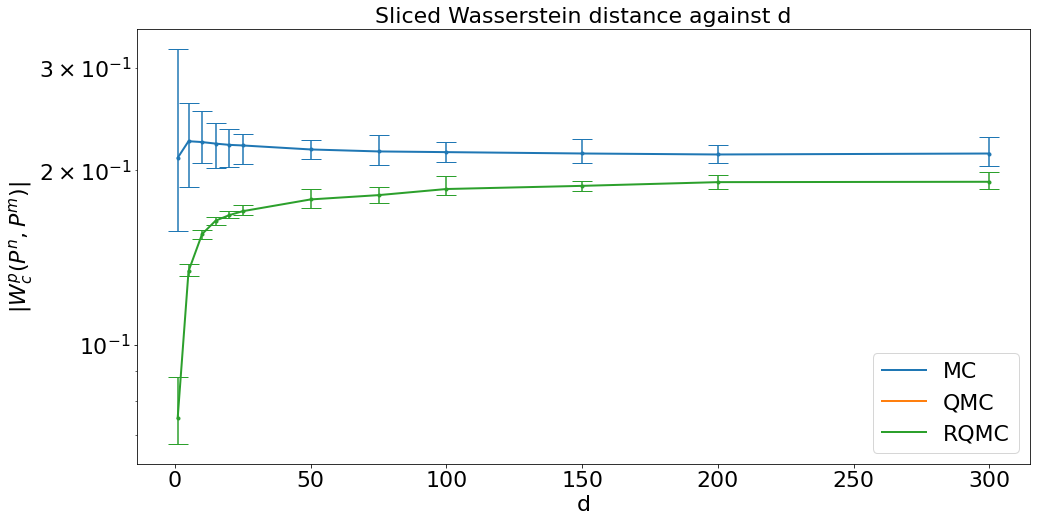

In [ ]:
plot_slicedW_conv_d(d,(16,8),w_mc,w_qmc,w_rqmc,'MC','QMC','RQMC',w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc)

In [ ]:
np.savez(path+"mvgandk_slicedw_d_n=8192_nproj=%s_%s.npz" %(n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)